Inputs:
- Latitude/Longitude: 48.865, 9.314
- Dachneigung zur Straße: 48º, Bearing: 285º (WNW), Azimuth for PVGIS: +105º
- Dachneigung zum Garten: 42º, Bearing: 105º (OSO), Azimuth for PVGIS: -75º

Links:
- [Stromverbrauch Haushalt - DeStatis](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/UGR/private-haushalte/Tabellen/stromverbrauch-haushalte.html)
- [PVGis Hourly](https://re.jrc.ec.europa.eu/pvg_tools/en/#api_5.3)
- [Sample data](https://data.open-power-system-data.org/household_data/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json


# Parameters

In [2]:
consumption_per_flat_per_year_kWh = 3200  # kWh
installed_power_oso_kWp = 10  # kWp
installed_power_wnw_kWp = 10  # kWp

battery_capacity_kWh = 20  # kWh
battery_discharge_cutoff_limit = 0.1  # 10% minimum charge
battery_charge_efficiency = 0.95  # 95% efficiency when charging

# Erzeugung

In [3]:
# load OSO data
path = "data\Timeseries_48.865_9.314_SA3_1kWp_crystSi_14_42deg_-75deg_2005_2023.json "
with open(path, "r") as file:
    data = json.load(file)

In [4]:
df_raw = pd.DataFrame(data['outputs']['hourly'])
df_raw["time"] = pd.to_datetime(df_raw.time.str.slice(0,4)+"-"\
                                +df_raw.time.str.slice(4,6)+"-"\
                                +df_raw.time.str.slice(6,8)+" "\
                                +df_raw.time.str.slice(9,11)+":"\
                                +df_raw.time.str.slice(11,13), utc=True)
df_pv_oso = df_raw.set_index("time")
df_pv_oso = df_pv_oso.tz_convert("Europe/Berlin")

In [5]:
df_pv_oso

,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,,
2005-01-01 01:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.25,3.17,0.0
2005-01-01 02:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.39,3.10,0.0
2005-01-01 03:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.97,0.0
2005-01-01 04:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.55,2.90,0.0
2005-01-01 05:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.83,0.0
...,...,...,...,...,...,...,...,...
2023-12-31 20:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.66,3.79,0.0
2023-12-31 21:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.38,3.79,0.0
2023-12-31 22:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.30,3.66,0.0


In [6]:
# load WNW data

path = "data\Timeseries_48.865_9.314_SA3_1kWp_crystSi_14_48deg_105deg_2005_2023.json"

with open(path, "r") as file:
    data2 = json.load(file)

In [7]:
df_raw2 = pd.DataFrame(data2['outputs']['hourly'])
df_raw2["time"] = pd.to_datetime(df_raw2.time.str.slice(0,4)+"-"\
                                +df_raw2.time.str.slice(4,6)+"-"\
                                +df_raw2.time.str.slice(6,8)+" "\
                                +df_raw2.time.str.slice(9,11)+":"\
                                +df_raw2.time.str.slice(11,13), utc=True)
df_pv_wnw = df_raw2.set_index("time")
df_pv_wnw = df_pv_wnw.tz_convert("Europe/Berlin")
display(df_pv_wnw)

,P,Gb(i),Gd(i),Gr(i),H_sun,T2m,WS10m,Int
time,,,,,,,,
2005-01-01 01:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.25,3.17,0.0
2005-01-01 02:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.39,3.10,0.0
2005-01-01 03:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.97,0.0
2005-01-01 04:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.55,2.90,0.0
2005-01-01 05:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.48,2.83,0.0
...,...,...,...,...,...,...,...,...
2023-12-31 20:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.66,3.79,0.0
2023-12-31 21:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.38,3.79,0.0
2023-12-31 22:10:00+01:00,0.0,0.0,0.0,0.0,0.0,4.30,3.66,0.0


# Verbrauch

In [8]:
df_raw = pd.read_csv('data/household_data_15min_singleindex_filtered.csv')
df_full = df_raw[['cet_cest_timestamp', 'DE_KN_residential2_grid_import']].copy()

df_full['cet_cest_timestamp'] = pd.to_datetime(df_full['cet_cest_timestamp'], utc=True)
df_full.set_index('cet_cest_timestamp', inplace=True)
df = df_full['DE_KN_residential2_grid_import'].diff().resample('h').sum()

In [9]:
df_filtered = df[(df.index >= pd.to_datetime("2016-01-01", utc=True)) & (df.index <= pd.to_datetime("2016-12-31 23:59:59", utc=True))]
consumption_year_total = df_filtered.sum()
consumption_year_total

np.float64(2719.2854101499997)

In [10]:
df_full2 = df_full[(df_full.index >= pd.to_datetime("2016-01-01", utc=True)) & (df_full.index <= pd.to_datetime("2016-12-31 23:59:59", utc=True))]
df_full2["DE_KN_residential2_grid_import"].iloc[-1] - df_full2["DE_KN_residential2_grid_import"].iloc[0]

np.float64(2719.2403662099996)

In [11]:
df_consumption = pd.DataFrame(df_filtered)
df_consumption.index = pd.to_datetime(df_consumption.index)
df_consumption.index.name = "time"
df_consumption.rename(columns={"DE_KN_residential2_grid_import": "consumption_kW"}, inplace=True)
df_consumption

,consumption_kW
time,
2016-01-01 00:00:00+00:00,0.164917
2016-01-01 01:00:00+00:00,0.194946
2016-01-01 02:00:00+00:00,0.110107
2016-01-01 03:00:00+00:00,0.169922
2016-01-01 04:00:00+00:00,0.204956
...,...
2016-12-31 19:00:00+00:00,0.239990
2016-12-31 20:00:00+00:00,0.140137
2016-12-31 21:00:00+00:00,0.149902


In [12]:
df_consumption

,consumption_kW
time,
2016-01-01 00:00:00+00:00,0.164917
2016-01-01 01:00:00+00:00,0.194946
2016-01-01 02:00:00+00:00,0.110107
2016-01-01 03:00:00+00:00,0.169922
2016-01-01 04:00:00+00:00,0.204956
...,...
2016-12-31 19:00:00+00:00,0.239990
2016-12-31 20:00:00+00:00,0.140137
2016-12-31 21:00:00+00:00,0.149902


# Berechnung

In [13]:
df_consumption.loc[:,"month"] = df_consumption.index.month
df_consumption.loc[:,"day"] = df_consumption.index.day
df_consumption.loc[:,"hour"] = df_consumption.index.hour

In [14]:
df = pd.merge(df_pv_oso["P"], df_pv_wnw["P"], on="time", suffixes=('_oso', '_wnw'))
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour
df

,P_oso,P_wnw,year,month,day,hour
time,,,,,,
2005-01-01 01:10:00+01:00,0.0,0.0,2005,1,1,1
2005-01-01 02:10:00+01:00,0.0,0.0,2005,1,1,2
2005-01-01 03:10:00+01:00,0.0,0.0,2005,1,1,3
2005-01-01 04:10:00+01:00,0.0,0.0,2005,1,1,4
2005-01-01 05:10:00+01:00,0.0,0.0,2005,1,1,5
...,...,...,...,...,...,...
2023-12-31 20:10:00+01:00,0.0,0.0,2023,12,31,20
2023-12-31 21:10:00+01:00,0.0,0.0,2023,12,31,21
2023-12-31 22:10:00+01:00,0.0,0.0,2023,12,31,22


In [15]:
df_consumption

,consumption_kW,month,day,hour
time,,,,
2016-01-01 00:00:00+00:00,0.164917,1,1,0
2016-01-01 01:00:00+00:00,0.194946,1,1,1
2016-01-01 02:00:00+00:00,0.110107,1,1,2
2016-01-01 03:00:00+00:00,0.169922,1,1,3
2016-01-01 04:00:00+00:00,0.204956,1,1,4
...,...,...,...,...
2016-12-31 19:00:00+00:00,0.239990,12,31,19
2016-12-31 20:00:00+00:00,0.140137,12,31,20
2016-12-31 21:00:00+00:00,0.149902,12,31,21


In [16]:
dfs = []
for year in range(2005, 2024):
    df_merged = pd.merge(df[df.year==year], df_consumption, on=["month", "day", "hour"], how="inner")
    dfs.append(df_merged)
df = pd.concat(dfs)
df["time"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df.set_index("time", inplace=True)

In [17]:
df

,P_oso,P_wnw,year,month,day,hour,consumption_kW
time,,,,,,,
2005-01-01 01:00:00,0.0,0.0,2005,1,1,1,0.194946
2005-01-01 02:00:00,0.0,0.0,2005,1,1,2,0.110107
2005-01-01 03:00:00,0.0,0.0,2005,1,1,3,0.169922
2005-01-01 04:00:00,0.0,0.0,2005,1,1,4,0.204956
2005-01-01 05:00:00,0.0,0.0,2005,1,1,5,0.125122
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,0.0,0.0,2023,12,31,19,0.239990
2023-12-31 20:00:00,0.0,0.0,2023,12,31,20,0.140137
2023-12-31 21:00:00,0.0,0.0,2023,12,31,21,0.149902


In [18]:
# scale consumption to desired value
scaling_factor = 5*consumption_per_flat_per_year_kWh / consumption_year_total
df["consumption_kW"] = df["consumption_kW"] * scaling_factor
df["PV_total_kW"] = installed_power_oso_kWp*df["P_oso"]*1e-3 + installed_power_wnw_kWp*df["P_wnw"]*1e-3

df["from_grid_kW"] = df["consumption_kW"] - df["PV_total_kW"]

In [19]:
df

,P_oso,P_wnw,year,month,day,hour,consumption_kW,PV_total_kW,from_grid_kW
time,,,,,,,,,
2005-01-01 01:00:00,0.0,0.0,2005,1,1,1,1.147044,0.0,1.147044
2005-01-01 02:00:00,0.0,0.0,2005,1,1,2,0.647861,0.0,0.647861
2005-01-01 03:00:00,0.0,0.0,2005,1,1,3,0.999803,0.0,0.999803
2005-01-01 04:00:00,0.0,0.0,2005,1,1,4,1.205941,0.0,1.205941
2005-01-01 05:00:00,0.0,0.0,2005,1,1,5,0.736206,0.0,0.736206
...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,0.0,0.0,2023,12,31,19,1.412078,0.0,1.412078
2023-12-31 20:00:00,0.0,0.0,2023,12,31,20,0.824550,0.0,0.824550
2023-12-31 21:00:00,0.0,0.0,2023,12,31,21,0.882010,0.0,0.882010


In [20]:
# Battery simulation

soc = battery_capacity_kWh/2  # initial state of charge (half full)
soc_list = []
grid_list = []
battery_charge_list = []
battery_discharge_list = []

for idx, row in df.iterrows():
    pv_surplus = row["PV_total_kW"] - row["consumption_kW"]
    
    # Charging
    if pv_surplus > 0:
        charge_possible = min(pv_surplus * battery_charge_efficiency, battery_capacity_kWh - soc)
        soc += charge_possible
        grid = 0
        battery_charge = charge_possible
        battery_discharge = 0
    
    # Discharging
    else:
        discharge_possible = min(-pv_surplus, soc - battery_capacity_kWh * battery_discharge_cutoff_limit)
        soc -= discharge_possible

        # Calculate grid energy needed: if battery discharge is less than the energy deficit, 
        # the remaining deficit must be covered by grid power, otherwise no grid power is needed
        grid = -pv_surplus - discharge_possible if discharge_possible < -pv_surplus else 0
        battery_charge = 0
        battery_discharge = discharge_possible
    soc_list.append(soc)
    grid_list.append(grid)
    battery_charge_list.append(battery_charge)
    battery_discharge_list.append(battery_discharge)

# Add results to DataFrame
df["battery_soc_kWh"] = soc_list
df["from_grid_kW"] = grid_list
df["battery_charge_kWh"] = battery_charge_list
df["battery_discharge_kWh"] = battery_discharge_list
df.head()

,P_oso,P_wnw,year,month,day,hour,consumption_kW,PV_total_kW,from_grid_kW,battery_soc_kWh,battery_charge_kWh,battery_discharge_kWh
time,,,,,,,,,,,,
2005-01-01 01:00:00,0.0,0.0,2005,1,1,1,1.147044,0.0,0.0,8.852956,0.0,1.147044
2005-01-01 02:00:00,0.0,0.0,2005,1,1,2,0.647861,0.0,0.0,8.205095,0.0,0.647861
2005-01-01 03:00:00,0.0,0.0,2005,1,1,3,0.999803,0.0,0.0,7.205292,0.0,0.999803
2005-01-01 04:00:00,0.0,0.0,2005,1,1,4,1.205941,0.0,0.0,5.999351,0.0,1.205941
2005-01-01 05:00:00,0.0,0.0,2005,1,1,5,0.736206,0.0,0.0,5.263145,0.0,0.736206


- **battery_soc_kWh**: The battery's state of charge (SoC) in kWh at each time step. It shows how much energy is stored in the battery.
- **from_grid_kW_battery**: The amount of energy (in kW) that must be drawn from the grid after accounting for PV generation and battery discharge. This is the residual demand not covered by PV or battery.
- **battery_charge_kWh**: The amount of energy (in kWh) charged into the battery at each time step. This occurs when PV generation exceeds consumption and the battery is not full.
- **battery_discharge_kWh**: The amount of energy (in kWh) discharged from the battery at each time step to cover consumption when PV generation is insufficient.

In [21]:
# Calculate annual averages for power usage from PV and battery
annual_stats = df.copy().groupby('year').agg({
    'PV_total_kW': 'sum',  # Total PV generation per year
    'consumption_kW': 'sum',  # Total consumption per year
    'from_grid_kW': 'sum',  # Total grid consumption with battery
    'battery_charge_kWh': 'sum',  # Total battery charging
    'battery_discharge_kWh': 'sum'  # Total battery discharging
}).reset_index()

# Calculate derived metrics
annual_stats['pv_used_kWh'] = annual_stats['consumption_kW'] - annual_stats['from_grid_kW']
annual_stats['pv_self_consumption_rate'] = annual_stats['pv_used_kWh'] / annual_stats['PV_total_kW'] * 100
annual_stats['grid_independence_rate'] = (1 - annual_stats['from_grid_kW'] / annual_stats['consumption_kW']) * 100

# Calculate averages across all years
avg_pv_used = annual_stats['pv_used_kWh'].mean()
avg_self_consumption_rate = annual_stats['pv_self_consumption_rate'].mean()
avg_grid_independence = annual_stats['grid_independence_rate'].mean()

print(f"Average annual PV power used: {avg_pv_used:.2f} kWh")
print(f"Average PV self-consumption rate: {avg_self_consumption_rate:.1f}%")
print(f"Average grid independence rate: {avg_grid_independence:.1f}%")

annual_stats

Average annual PV power used: 10014.79 kWh
Average PV self-consumption rate: 60.4%
Average grid independence rate: 62.7%


,year,PV_total_kW,consumption_kW,from_grid_kW,battery_charge_kWh,battery_discharge_kWh,pv_used_kWh,pv_self_consumption_rate,grid_independence_rate
0,2005,16115.0148,15964.800395,6187.140055,3745.658083,3753.658083,9777.660339,60.674225,61.245115
1,2006,16503.9800,15965.344469,5768.396947,3812.832535,3811.431796,10196.947521,61.784779,63.869261
2,2007,16517.4684,15965.578618,5990.299508,3747.233823,3748.634562,9975.279109,60.392300,62.479910
3,2008,15736.6463,15999.899086,6186.390729,3754.722457,3751.034122,9813.508357,62.360862,61.334814
4,2009,15986.2689,15966.194876,6294.796892,3663.842158,3667.530493,9671.397984,60.498157,60.574220
5,2010,15275.8374,15965.474831,6590.928439,3480.941549,3480.941549,9374.546391,61.368461,58.717617
6,2011,17354.5014,15965.770749,5536.410930,3975.447731,3975.447731,10429.359819,60.095992,65.323247
7,2012,16714.0054,15999.705518,5655.118402,4027.892957,4025.167053,10344.587116,61.891730,64.654859
8,2013,15207.3024,15974.037081,6511.018025,3563.687628,3557.794278,9463.019056,62.226809,59.239997
9,2014,16664.2873,15965.772186,5828.887408,3867.985771,3876.605026,10136.884778,60.829993,63.491353


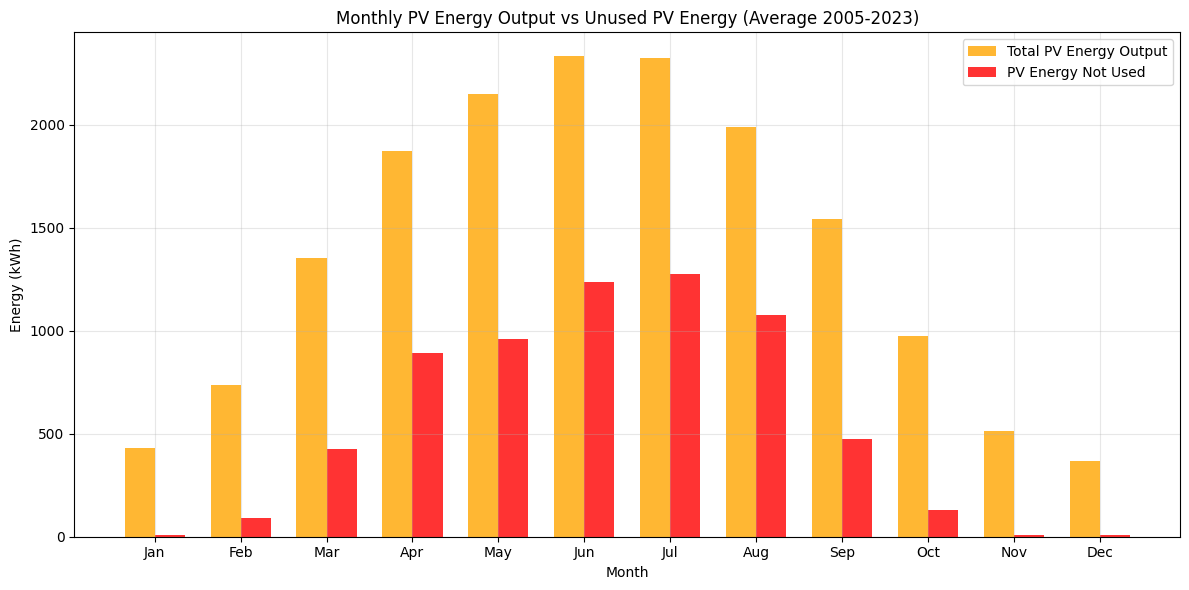

In [22]:
# Calculate monthly data for PV generation and unused PV energy
monthly_data = df.copy().groupby(['year', 'month']).agg({
    'PV_total_kW': 'sum',
    'consumption_kW': 'sum',
    'from_grid_kW': 'sum'
}).reset_index()

# Calculate PV used and unused for each month
monthly_data['pv_used_kWh'] = monthly_data['consumption_kW'] - monthly_data['from_grid_kW']
monthly_data['pv_unused_kWh'] = monthly_data['PV_total_kW'] - monthly_data['pv_used_kWh']

# Calculate average across all years for each month
monthly_avg = monthly_data.groupby('month').agg({
    'PV_total_kW': 'mean',
    'pv_unused_kWh': 'mean'
}).reset_index()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = np.arange(len(months))
width = 0.35

bars1 = ax.bar(x - width/2, monthly_avg['PV_total_kW'], width, 
              label='Total PV Energy Output', color='orange', alpha=0.8)
bars2 = ax.bar(x + width/2, monthly_avg['pv_unused_kWh'], width, 
              label='PV Energy Not Used', color='red', alpha=0.8)

ax.set_xlabel('Month')
ax.set_ylabel('Energy (kWh)')
ax.set_title('Monthly PV Energy Output vs Unused PV Energy (Average 2005-2023)')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
df_copy = df.copy()
df_copy["year"] = df_copy.index.year
df_copy["month"] = df_copy.index.month
df_copy["day"] = df_copy.index.day

daily_battery = df_copy.groupby([df_copy.year, df_copy.month, df_copy.day]).agg({
    'battery_soc_kWh': ['min', 'max']
}).reset_index()

# Flatten column names and rename index levels
daily_battery.columns = ['year', 'month', 'day', 'soc_min', 'soc_max']


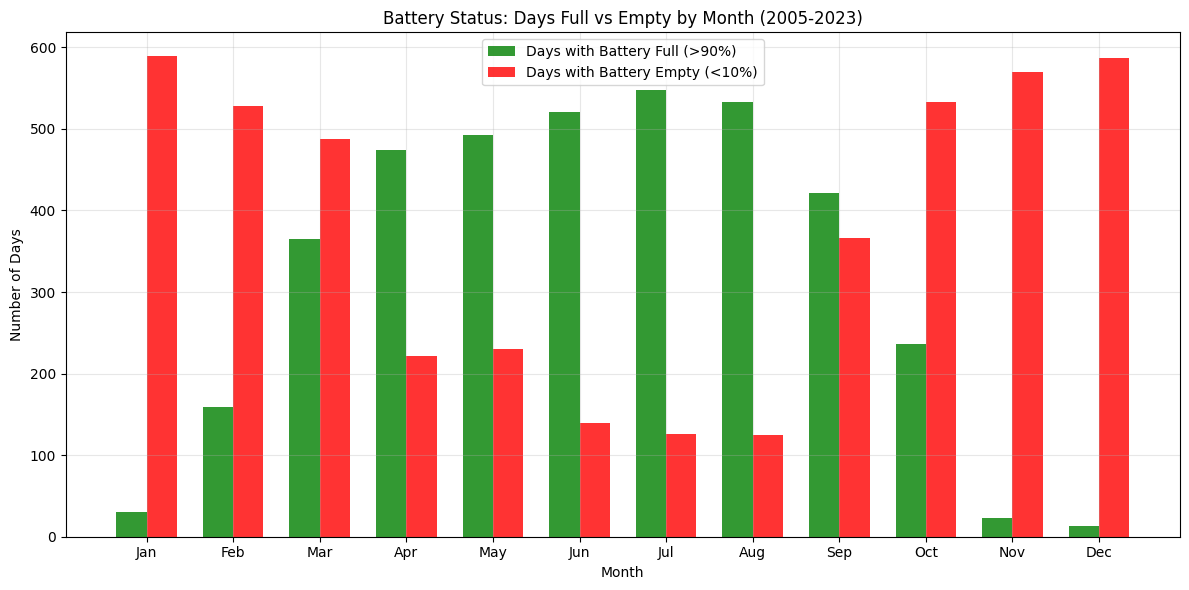

In [24]:
# Define battery full and empty thresholds
battery_full_threshold = battery_capacity_kWh * 0.9  # 90% capacity
battery_empty_threshold = battery_capacity_kWh * battery_discharge_cutoff_limit  # 10% capacity

# Classify days
daily_battery['battery_full'] = daily_battery['soc_max'] >= battery_full_threshold
daily_battery['battery_empty'] = daily_battery['soc_min'] <= battery_empty_threshold

# Count days per month across all years
monthly_battery_status = daily_battery.groupby('month').agg({
    'battery_full': 'sum',
    'battery_empty': 'sum'
}).reset_index()

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(months))
width = 0.35

bars1 = ax.bar(x - width/2, monthly_battery_status['battery_full'], width, 
              label='Days with Battery Full (>90%)', color='green', alpha=0.8)
bars2 = ax.bar(x + width/2, monthly_battery_status['battery_empty'], width, 
              label='Days with Battery Empty (<10%)', color='red', alpha=0.8)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Days')
ax.set_title('Battery Status: Days Full vs Empty by Month (2005-2023)')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()